<a href="https://colab.research.google.com/github/tomektom10/dataScienceBootCamp/blob/main/okreslenia_wplywu_malo_zmienncyh_nocne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import pandas as pd
import numpy as np
df = pd.read_excel("DANE_KRZYCHU_całe.xlsx")

In [67]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [68]:
df.columns

Index(['Datetime', 'Hour', 'Day', 'SK Price Spot EUR/MWh OKTE ',
       'Imbalance Price OKTE', 'Unnamed: 5',
       'SK Nuclear Production MWh/h H Actual',
       'SK Hydro Run-of-river Production MWh/h H Actual',
       'SK Natural Gas Power Production MWh/h H Actual',
       'SK Solar Photovoltaic Production MWh/h H Actual',
       'SK Hydro Pumped-storage Production MWh/h H Actual',
       'SK Other Power Production MWh/h H Actual',
       'SK Hydro Reservoir Production MWh/h H Actual',
       'SK Biomass Power Production MWh/h H Actual',
       'SK Hard Coal Power Production MWh/h H Actual',
       'SK sum of Production MWh/h', 'Unnamed: 16',
       'SK Consumption MWh/h H Actual',
       'SK Consumption Index Cooling % 15min Synthetic',
       'SK Consumption Index Heating % H Actual',
       'SK Consumption Index Chilling % 15min Synthetic',
       'SK Consumption Index Cloudiness % 15min Synthetic',
       'SK Consumption Temperature °C H Actual', 'Unnamed: 23',
       'SK Exch

In [69]:
df['Zysk/Strata'] = df['Imbalance Price OKTE'] - df['SK Price Spot EUR/MWh OKTE ']

In [70]:
df

,Datetime,Hour,Day,SK Price Spot EUR/MWh OKTE,Imbalance Price OKTE,Unnamed: 5,SK Nuclear Production MWh/h H Actual,SK Hydro Run-of-river Production MWh/h H Actual,SK Natural Gas Power Production MWh/h H Actual,SK Solar Photovoltaic Production MWh/h H Actual,...,CZ>SK Exchange Physical Flow MWh/h H Actual,Unnamed: 29,SK Volume Imbalance Net MWh 15min Actual,Unnamed: 31,Weighted average price of all trades (EUR/MWh),Minimal price (EUR/MWh),Maximal price (EUR/MWh),Unnamed: 35,Traded Price Average (EUR/MWh),Zysk/Strata
0,2023-01-01 00:00:00,1,7,20.26,-5.000000,NaN,1979.0,252.0,178.0,0.0,...,2103.0,NaN,69.5,NaN,18.93,7.00,30.26,NaN,19.40,-25.260000
1,2023-01-01 01:00:00,2,7,0.33,-4.997500,NaN,1976.0,247.0,183.0,0.0,...,1986.0,NaN,20.8,NaN,1.35,0.30,10.33,NaN,3.07,-5.327500
2,2023-01-01 02:00:00,3,7,0.50,-5.000000,NaN,1981.0,244.0,177.0,0.0,...,2037.0,NaN,39.0,NaN,2.05,0.50,10.50,NaN,4.18,-5.500000
3,2023-01-01 03:00:00,4,7,0.50,-5.000000,NaN,1984.0,243.0,175.0,0.0,...,1888.0,NaN,27.8,NaN,2.26,0.00,10.50,NaN,4.40,-5.500000
4,2023-01-01 04:00:00,5,7,0.10,-5.000000,NaN,1984.0,241.0,177.0,0.0,...,1834.0,NaN,61.2,NaN,3.12,0.00,10.10,NaN,5.08,-5.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14851,2024-09-10 19:00:00,20,2,330.48,368.288725,NaN,1912.0,564.0,509.0,1.0,...,1077.2,NaN,0.0,NaN,396.74,392.10,400.00,NaN,396.13,37.808725
14852,2024-09-10 20:00:00,21,2,186.49,293.693750,NaN,1918.0,559.0,510.0,0.0,...,1077.8,NaN,-1.0,NaN,248.35,195.14,280.65,NaN,250.26,107.203750
14853,2024-09-10 21:00:00,22,2,102.91,132.848475,NaN,1921.0,441.0,484.0,0.0,...,1202.0,NaN,3.2,NaN,129.50,122.91,133.00,NaN,129.15,29.938475
14854,2024-09-10 22:00:00,23,2,101.79,35.229700,NaN,1924.0,424.0,336.0,0.0,...,1530.8,NaN,1.8,NaN,93.12,68.14,110.00,NaN,94.81,-66.560300


In [71]:
godziny_nocne = df[(df['Hour'] >= 1) & (df['Hour'] <= 6)]

# Wyświetlamy wynik
godziny_nocne

,Datetime,Hour,Day,SK Price Spot EUR/MWh OKTE,Imbalance Price OKTE,Unnamed: 5,SK Nuclear Production MWh/h H Actual,SK Hydro Run-of-river Production MWh/h H Actual,SK Natural Gas Power Production MWh/h H Actual,SK Solar Photovoltaic Production MWh/h H Actual,...,CZ>SK Exchange Physical Flow MWh/h H Actual,Unnamed: 29,SK Volume Imbalance Net MWh 15min Actual,Unnamed: 31,Weighted average price of all trades (EUR/MWh),Minimal price (EUR/MWh),Maximal price (EUR/MWh),Unnamed: 35,Traded Price Average (EUR/MWh),Zysk/Strata
0,2023-01-01 00:00:00,1,7,20.26,-5.000000,NaN,1979.0,252.0,178.0,0.0,...,2103.0,NaN,69.5,NaN,18.93,7.00,30.26,NaN,19.40,-25.260000
1,2023-01-01 01:00:00,2,7,0.33,-4.997500,NaN,1976.0,247.0,183.0,0.0,...,1986.0,NaN,20.8,NaN,1.35,0.30,10.33,NaN,3.07,-5.327500
2,2023-01-01 02:00:00,3,7,0.50,-5.000000,NaN,1981.0,244.0,177.0,0.0,...,2037.0,NaN,39.0,NaN,2.05,0.50,10.50,NaN,4.18,-5.500000
3,2023-01-01 03:00:00,4,7,0.50,-5.000000,NaN,1984.0,243.0,175.0,0.0,...,1888.0,NaN,27.8,NaN,2.26,0.00,10.50,NaN,4.40,-5.500000
4,2023-01-01 04:00:00,5,7,0.10,-5.000000,NaN,1984.0,241.0,177.0,0.0,...,1834.0,NaN,61.2,NaN,3.12,0.00,10.10,NaN,5.08,-5.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,2024-09-10 01:00:00,2,2,57.78,-4.620325,NaN,1932.0,233.0,78.0,0.0,...,1565.8,NaN,8.2,NaN,68.11,63.88,77.78,NaN,68.05,-62.400325
14834,2024-09-10 02:00:00,3,2,59.36,-4.063375,NaN,1932.0,235.0,79.0,0.0,...,1388.8,NaN,7.0,NaN,63.95,34.63,69.90,NaN,61.52,-63.423375
14835,2024-09-10 03:00:00,4,2,54.92,135.303750,NaN,1932.0,251.0,86.0,0.0,...,1292.8,NaN,-3.0,NaN,62.25,46.90,72.50,NaN,62.46,80.383750
14836,2024-09-10 04:00:00,5,2,61.31,110.938750,NaN,1930.0,237.0,95.0,0.0,...,1370.2,NaN,-1.2,NaN,60.64,39.59,81.31,NaN,57.78,49.628750


In [72]:
print(X_train.dtypes)

SK Nuclear Production MWh/h H Actual                   float64
SK Hydro Run-of-river Production MWh/h H Actual        float64
SK Natural Gas Power Production MWh/h H Actual         float64
SK Solar Photovoltaic Production MWh/h H Actual        float64
SK Hydro Pumped-storage Production MWh/h H Actual        int64
SK Other Power Production MWh/h H Actual               float64
SK Hydro Reservoir Production MWh/h H Actual           float64
SK Exchange Physical Flow Net Import MWh/h H Actual    float64
dtype: object


In [73]:
godziny_nocne.columns

Index(['Datetime', 'Hour', 'Day', 'SK Price Spot EUR/MWh OKTE ',
       'Imbalance Price OKTE', 'Unnamed: 5',
       'SK Nuclear Production MWh/h H Actual',
       'SK Hydro Run-of-river Production MWh/h H Actual',
       'SK Natural Gas Power Production MWh/h H Actual',
       'SK Solar Photovoltaic Production MWh/h H Actual',
       'SK Hydro Pumped-storage Production MWh/h H Actual',
       'SK Other Power Production MWh/h H Actual',
       'SK Hydro Reservoir Production MWh/h H Actual',
       'SK Biomass Power Production MWh/h H Actual',
       'SK Hard Coal Power Production MWh/h H Actual',
       'SK sum of Production MWh/h', 'Unnamed: 16',
       'SK Consumption MWh/h H Actual',
       'SK Consumption Index Cooling % 15min Synthetic',
       'SK Consumption Index Heating % H Actual',
       'SK Consumption Index Chilling % 15min Synthetic',
       'SK Consumption Index Cloudiness % 15min Synthetic',
       'SK Consumption Temperature °C H Actual', 'Unnamed: 23',
       'SK Exch

Mean Squared Error (MSE): 2299.957303494022
                                             Feature  Importance
2     SK Natural Gas Power Production MWh/h H Actual    0.231097
0               SK Nuclear Production MWh/h H Actual    0.169299
1    SK Hydro Run-of-river Production MWh/h H Actual    0.163251
5           SK Other Power Production MWh/h H Actual    0.151588
7  SK Exchange Physical Flow Net Import MWh/h H A...    0.148905
6       SK Hydro Reservoir Production MWh/h H Actual    0.069157
4  SK Hydro Pumped-storage Production MWh/h H Actual    0.036942
3    SK Solar Photovoltaic Production MWh/h H Actual    0.029760


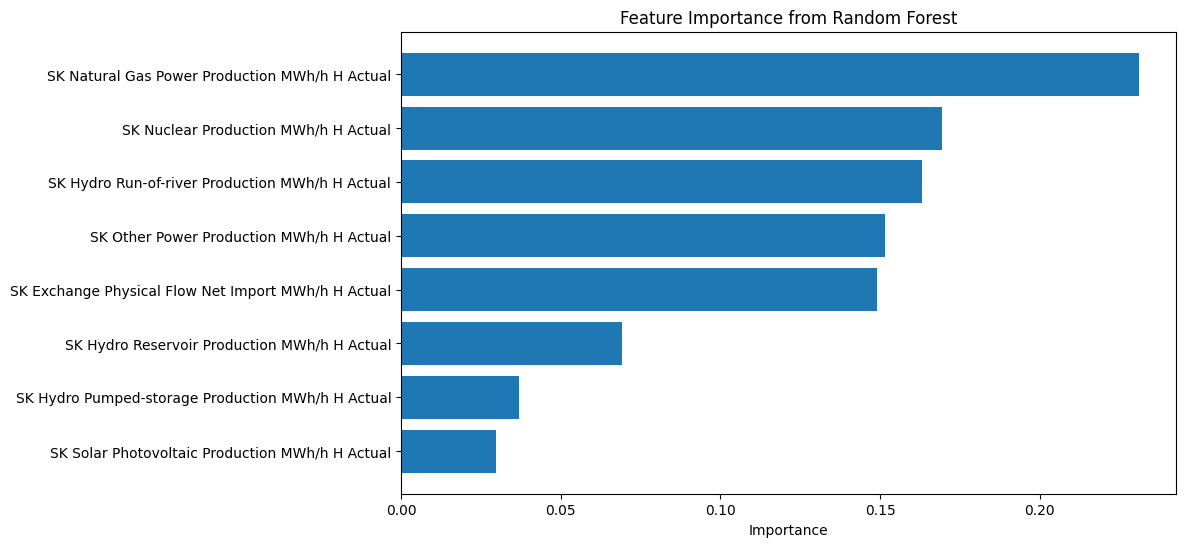

In [74]:
# Usuwanie zbędnych kolumn
#godziny_nocne = godziny_nocne.drop(columns=['Datetime'])  # Datetime możemy usunąć, jeśli nie ma istotnej wartości predykcyjnej

#godziny_nocne.drop(columns=['Datetime'], inplace=True)

# Sprawdzenie brakujących wartości i wypełnienie, jeśli potrzeba
godziny_nocne = godziny_nocne.fillna(0)

# Definiowanie zmiennych niezależnych (features) i zależnych (target)
#X = godziny_nocne.drop(columns=['Zysk/Strata', "Imbalance Price OKTE", "SK Price Spot EUR/MWh OKTE ", "SK Volume Imbalance Net MWh 15min Actual"])  # Wszystkie kolumny oprócz Zysk/Strata
X = godziny_nocne[['SK Nuclear Production MWh/h H Actual',
                   'SK Hydro Run-of-river Production MWh/h H Actual',
                   'SK Natural Gas Power Production MWh/h H Actual',
                   'SK Solar Photovoltaic Production MWh/h H Actual',
                   "SK Hydro Pumped-storage Production MWh/h H Actual",
                   "SK Other Power Production MWh/h H Actual",
                   "SK Hydro Reservoir Production MWh/h H Actual",
                   'SK Exchange Physical Flow Net Import MWh/h H Actual']]

y = godziny_nocne['Imbalance Price OKTE']

# Podział na dane treningowe i testowe (80% trening, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicjalizacja modelu RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Trening modelu
rf.fit(X_train, y_train)

# Przewidywanie na danych testowych
y_pred = rf.predict(X_test)

# Obliczanie błędu średniokwadratowego (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Ważność cech (Feature Importance)
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Rysowanie wykresu ważności cech
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()